In [87]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans

In [2]:
# 设置画图显示中文字符集
plt.rcParams['font.sans-serif'] = ['Heiti']
plt.rcParams['axes.unicode_minus'] = False

### 创建模拟数据集

In [33]:
data1, Y1 = make_blobs(n_samples=1500, n_features=2, centers=4, random_state=9)
# 生成测试数据集
x_test, y_test = make_blobs(n_samples=50, n_features=2, centers=4, random_state=9)
data2, Y2 = make_blobs(n_samples=1500, n_features=2, centers=4, random_state=9)
# 两个特征好画图
# 从数据集中挑选部分数据作为训练数据
# np.vstack()  将数组按照竖直的方向堆叠起来
data3 = np.vstack((
    data1[Y1 == 0][:200], data1[Y1 == 1][:100], 
    data1[Y1 == 2][:10], data1[Y1 == 3][:50]
))
Y = np.array([0]*200 + [1]*100 + [2]*10 + [3]*50)


### 构建训练模型

In [29]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=9)
kmeans.fit(data1, Y1)    # Y可以忽略

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=9, tol=0.0001, verbose=0)

In [34]:
# y预测分类结果
y_predict = kmeans.predict(data1)
y_predict2 = kmeans.predict(data2)
y_predict3 = kmeans.predict(data3)

# 查看相关属性
print('迭代次数：', kmeans.n_iter_)
print('簇心坐标：', kmeans.cluster_centers_)
print('所有样本到簇心的距离和：', kmeans.inertia_)

迭代次数： 6
簇心坐标： [[-3.04296577e-03 -7.42822390e+00]
 [-9.75561307e+00  8.32157893e-02]
 [-7.21646195e+00 -5.66653868e+00]
 [-1.67442575e+00 -4.97734339e+00]]
所有样本到簇心的距离和： 2893.1308208520422


### 绘制散点图

In [66]:
def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d+1, b+d+1

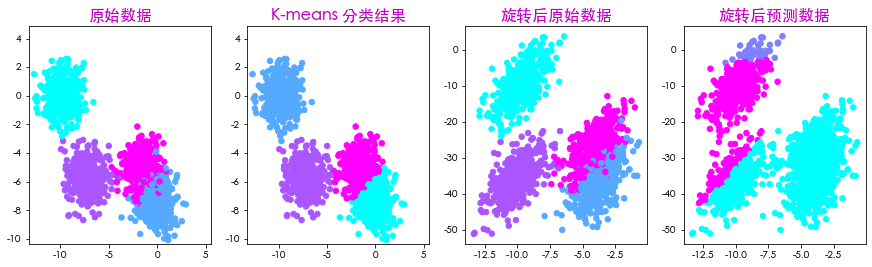

In [115]:
# 设置散点的颜色
cm = colors.ListedColormap('rgbmyc')
plt.figure(figsize=(15, 4), facecolor='w')

# 第一张图，初始数据
plt.subplot(1, 4, 1)
plt.scatter(data1[:, 0], data1[:, 1], c=Y1, cmap='cool', s=30, edgecolors=None)
plt.title('原始数据', fontsize=16, color='m')
# 计算边界
x1_min, x2_min = np.min(data1, axis=0)
x1_max, x2_max = np.max(data1, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim([x1_min, x1_max])
plt.ylim([x2_min, x2_max])
# plt.grid('x')

# 第二张图, data1 预测数据
plt.subplot(1, 4, 2)
plt.scatter(data1[:, 0], data1[:, 1], c=y_predict, cmap='cool', s=30)
plt.title('K-means 聚类结果', fontsize=16, color='m')
plt.xlim([x1_min, x1_max])
plt.ylim([x2_min, x2_max])
# plt.grid(True)

# 第三张图，反转数据
plt.subplot(1, 4, 3)
data_r = data1.dot(np.array(((1, 1), (0.5, 5))))
y_r_predict = kmeans.predict(data_r, Y1)
plt.scatter(data_r[:, 0], data_r[:, 1], c=Y1, cmap='cool', s=30)
plt.title('旋转后原始数据', fontsize=16, color='m')

# 第四张图，旋转预测数据
plt.subplot(1, 4, 4)
data_r = data1.dot(np.array(((1, 1), (0.5, 5))))
y_r_predict = kmeans.predict(data_r, Y1)
plt.scatter(data_r[:, 0], data_r[:, 1], c=y_r_predict, cmap='cool', s=30)
plt.title('旋转后预测数据', fontsize=16, color='m')
plt.show()

In [101]:
np.array(((1, 1), (0.5, 5)))

array([[1. , 1. ],
       [0.5, 5. ]])

In [107]:
data1[:10].dot(np.array(((1, 1), (0.5, 5))))

array([[-10.26262499, -36.77316446],
       [ -3.76000913, -37.06491907],
       [ -4.78002041, -40.21232384],
       [-10.34127182, -34.28840621],
       [ -4.42660862, -40.74383289],
       [ -3.08260366, -42.3122616 ],
       [ -5.03318107, -33.07970045],
       [-10.25175495, -11.12476181],
       [ -9.3299535 , -30.31645692],
       [ -4.41312056, -27.07419355]])

In [108]:
data1[:10]

array([[ -7.3170095 ,  -5.89123099],
       [ -0.05946358,  -7.4010911 ],
       [ -0.8430978 ,  -7.87384521],
       [ -7.68047911,  -5.32158542],
       [ -0.39136148,  -8.07049428],
       [  1.27624722,  -8.71770176],
       [ -1.91690114,  -6.23255986],
       [-10.15475419,  -0.19400153],
       [ -6.99811979,  -4.66366743],
       [ -1.89522356,  -5.035794  ]])

dot():返回两个数组的内积

In [98]:

a = np.array([1, 2])
b = np.array([1, 2])
b.dot(a)

5